### 부산시 기온데이터

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('./data/busan_기온.csv', encoding='cp949', skiprows=7)

In [7]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [10]:
df[df['최고기온(℃)'] == df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


In [19]:
# 일교차 가장 큰날
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)']

In [18]:
df[df['일교차'] == df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


In [15]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [17]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


In [24]:
# 그래프 표현
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

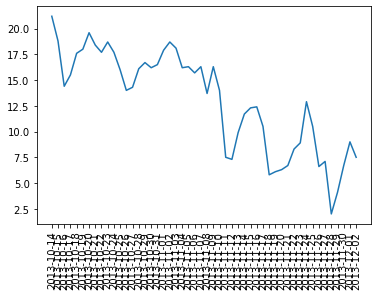

In [26]:
plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050], rotation=90)
plt.show()

In [50]:
# 2000년 이후 3월 1일 이후 최고/최저 기온 확인
# 연도/월/일 분리

df['연도'] = df['날짜'].apply(lambda x : x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x : x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x : x.split('-')[2])
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차,연도,월,일
0,1904-04-09,159,11.3,7.8,16.1,8.3,1904,04,09
1,1904-04-10,159,9.3,4.7,15.2,10.5,1904,04,10
2,1904-04-11,159,10.6,NaN,14.9,NaN,1904,04,11
3,1904-04-12,159,11.3,8.8,13.4,4.6,1904,04,12
4,1904-04-13,159,14.5,11.1,16.9,5.8,1904,04,13


In [51]:
# 2000년 이후 연도만 리스트로 저장

year = df[df['연도'] >= '2000']['연도'].unique()
ticks = range(len(year))
print(year)
print(ticks)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
range(0, 23)


In [55]:
최고기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')]['최고기온(℃)']

최고기온.index = ticks
최고기온

0     12.1
1     11.9
2     15.1
3      8.6
4     10.0
5      9.4
6      6.4
7     14.5
8     13.4
9     13.6
10     9.9
11     9.7
12    12.5
13    14.2
14    11.4
15     9.6
16     7.7
17    13.8
18    12.0
19    16.1
20    15.6
21    15.5
22    15.0
Name: 최고기온(℃), dtype: float64

In [56]:
최저기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')]['최저기온(℃)']

최저기온.index = ticks
최저기온

0     1.0
1     6.0
2     6.8
3     5.7
4     4.5
5    -0.1
6     0.4
7     4.7
8     2.1
9     5.9
10    5.5
11    2.5
12    6.2
13    1.1
14    8.0
15    2.2
16   -4.3
17    6.2
18    2.7
19    7.0
20    7.2
21    5.2
22    8.3
Name: 최저기온(℃), dtype: float64

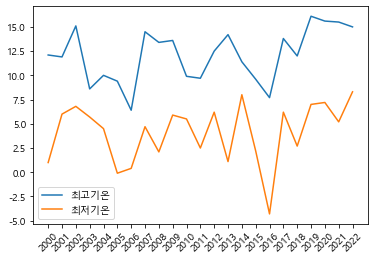

In [60]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(최고기온, label='최고기온')
plt.plot(최저기온, label='최저기온')
plt.xticks(ticks, year, rotation=45)
plt.legend()
plt.show()

연도
1904    16.880524
1905    13.973151
1906    13.076438
1907    13.579178
1908    13.347814
          ...    
2018    15.115068
2019    15.751507
2020    15.205464
2021    15.771233
2022    10.632680
Name: 평균기온(℃), Length: 119, dtype: float64


<AxesSubplot:xlabel='연도'>

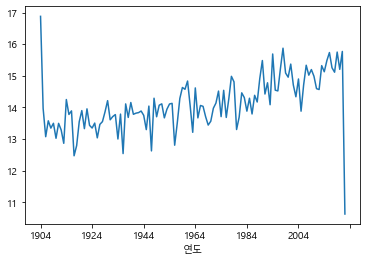

In [63]:
df_group = df.groupby('연도')['평균기온(℃)'].mean()
print(df_group)
df_group.plot()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.700e+01, 1.300e+01,
        1.500e+01, 2.600e+01, 4.800e+01, 4.200e+01, 5.400e+01, 6.000e+01,
        1.060e+02, 1.230e+02, 9.600e+01, 1.850e+02, 1.220e+02, 2.000e+02,
        1.800e+02, 2.920e+02, 2.340e+02, 3.150e+02, 2.810e+02, 4.070e+02,
        4.190e+02, 3.690e+02, 5.070e+02, 4.230e+02, 5.760e+02, 4.550e+02,
        6.520e+02, 5.020e+02, 6.740e+02, 5.270e+02, 7.430e+02, 6.920e+02,
        5.510e+02, 6.700e+02, 5.500e+02, 6.910e+02, 5.840e+02, 7.350e+02,
        5.770e+02, 6.760e+02, 7.060e+02, 5.950e+02, 6.740e+02, 5.340e+02,
        7.620e+02, 6.090e+02, 7.200e+02, 5.540e+02, 8.060e+02, 6.060e+02,
        7.670e+02, 7.790e+02, 7.060e+02, 9.070e+02, 7.350e+02, 9.740e+02,
        8.050e+02, 1.066e+03, 8.440e+02, 1.143e+03, 1.066e+03, 8.930e+02,
        1.073e+03, 8.280e+02, 9.860e+02, 7.560e+02, 8.890e+02, 6.960e+02,
        7.080e+02, 5.920e+02, 7.240e+0

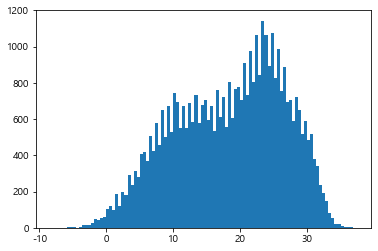

In [65]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.hist(df['최고기온(℃)'], bins=100)